In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

$$\frac{dN}{dt}=r\left(1-\frac{N}{K}\right)N$$

In [12]:
help(odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False
)
    Integrate a system of ordinary differential equations.

    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.

    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.

    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::

        dy/dt = func(y, t, ...)  [or func(t, y, ...)]

    where y can be a vector.

    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
             

In [13]:
def growth_model(N, t, r, K):
    dNdt = r * N * (1 - N / K)
    return dNdt

In [14]:
t = np.linspace(0, 10, 100)
N0 = 1
N1 = 15

r = 1
K = 10

In [17]:
sN0 = odeint(growth_model, N0, t, args=(r, K))
sN1 = odeint(growth_model, N1, t, args=(r, K))

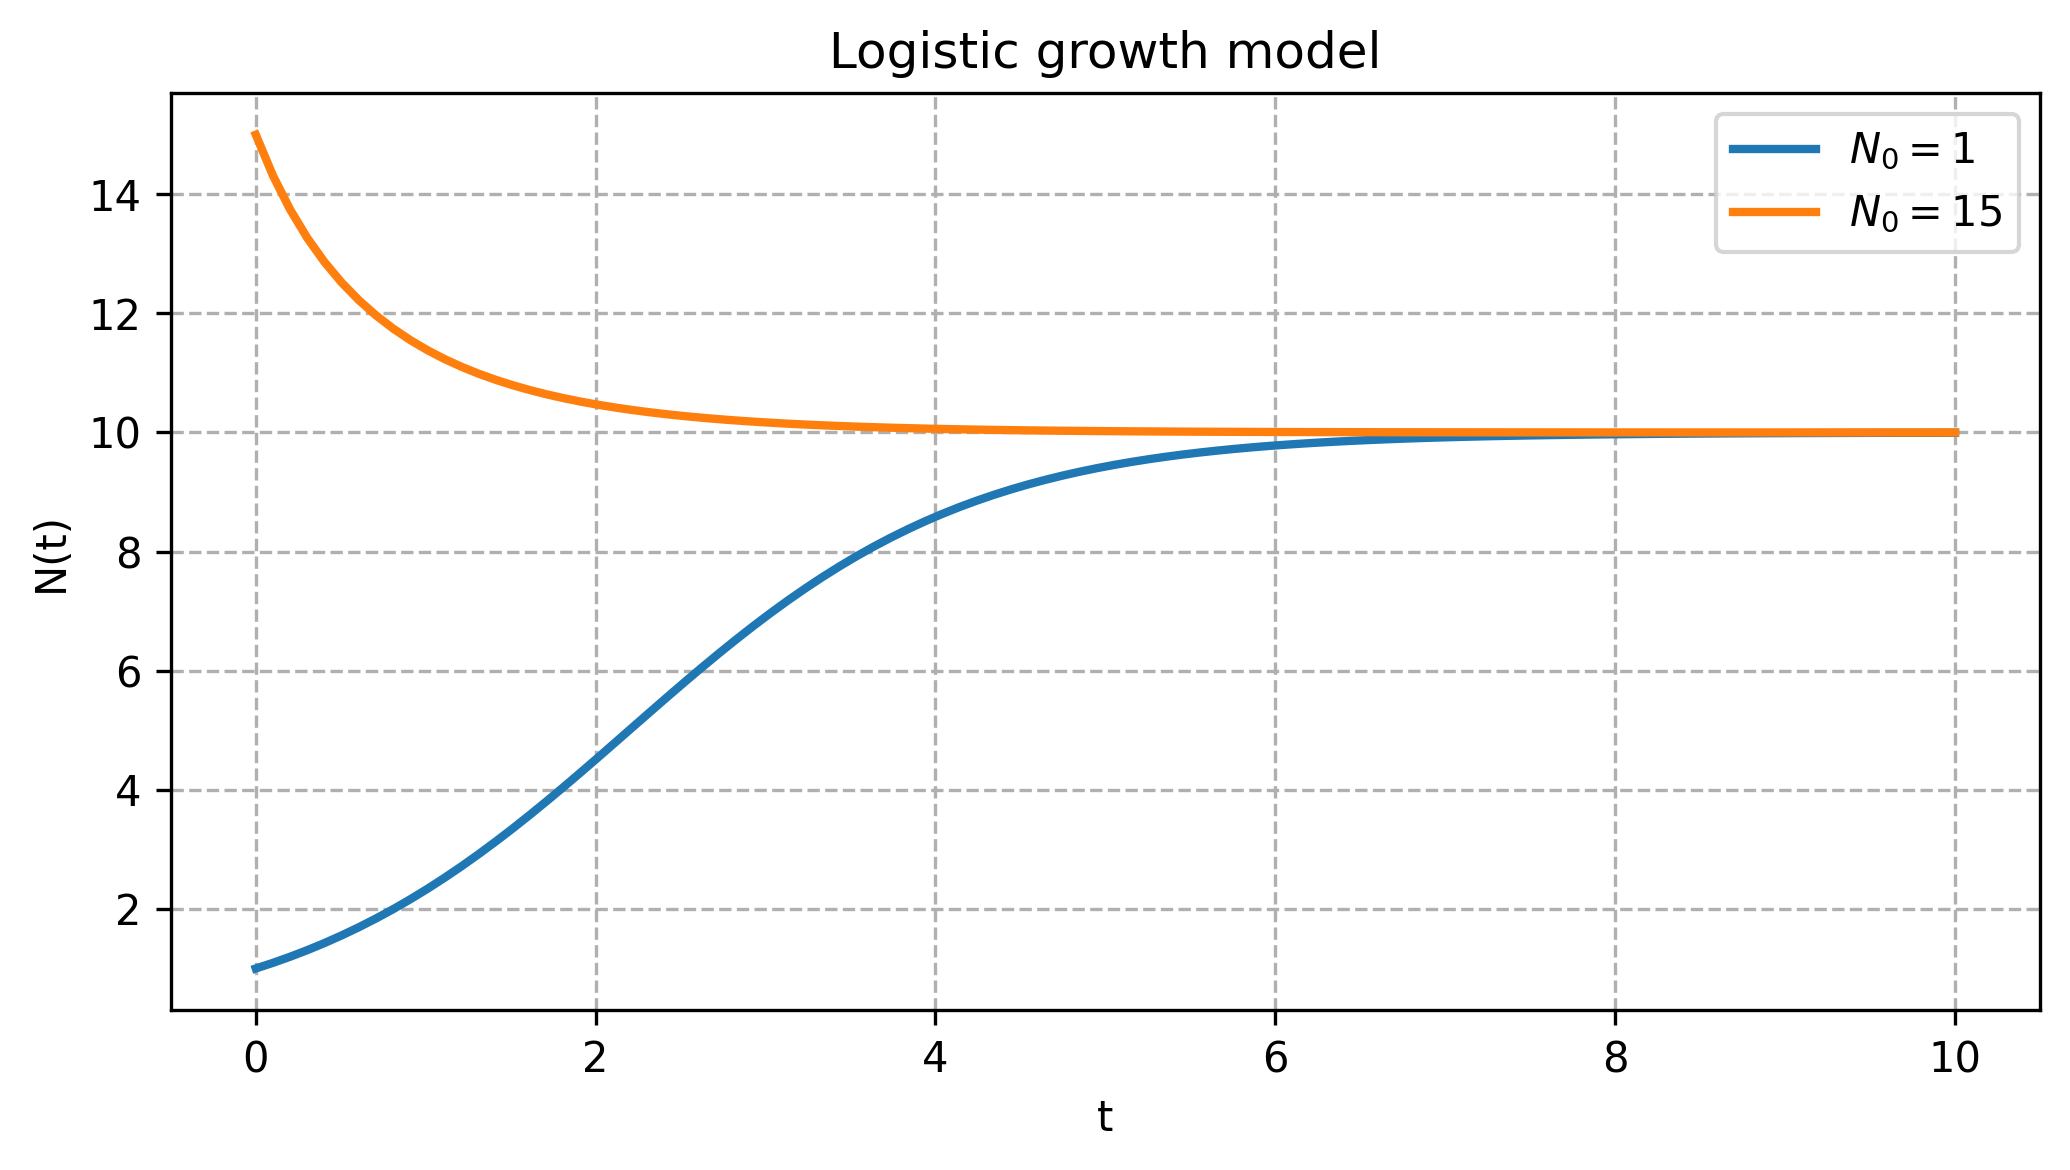

In [ ]:
plt.figure(figsize=(7, 4), dpi=300)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.plot(t, sN1, lw=2, label='$N_0=15$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('Logistic growth model')
plt.grid(ls='--')
plt.legend()
plt.tight_layout()
plt.savefig('logistic_growth_model.png')
plt.savefig('logistic_growth_model.pdf')

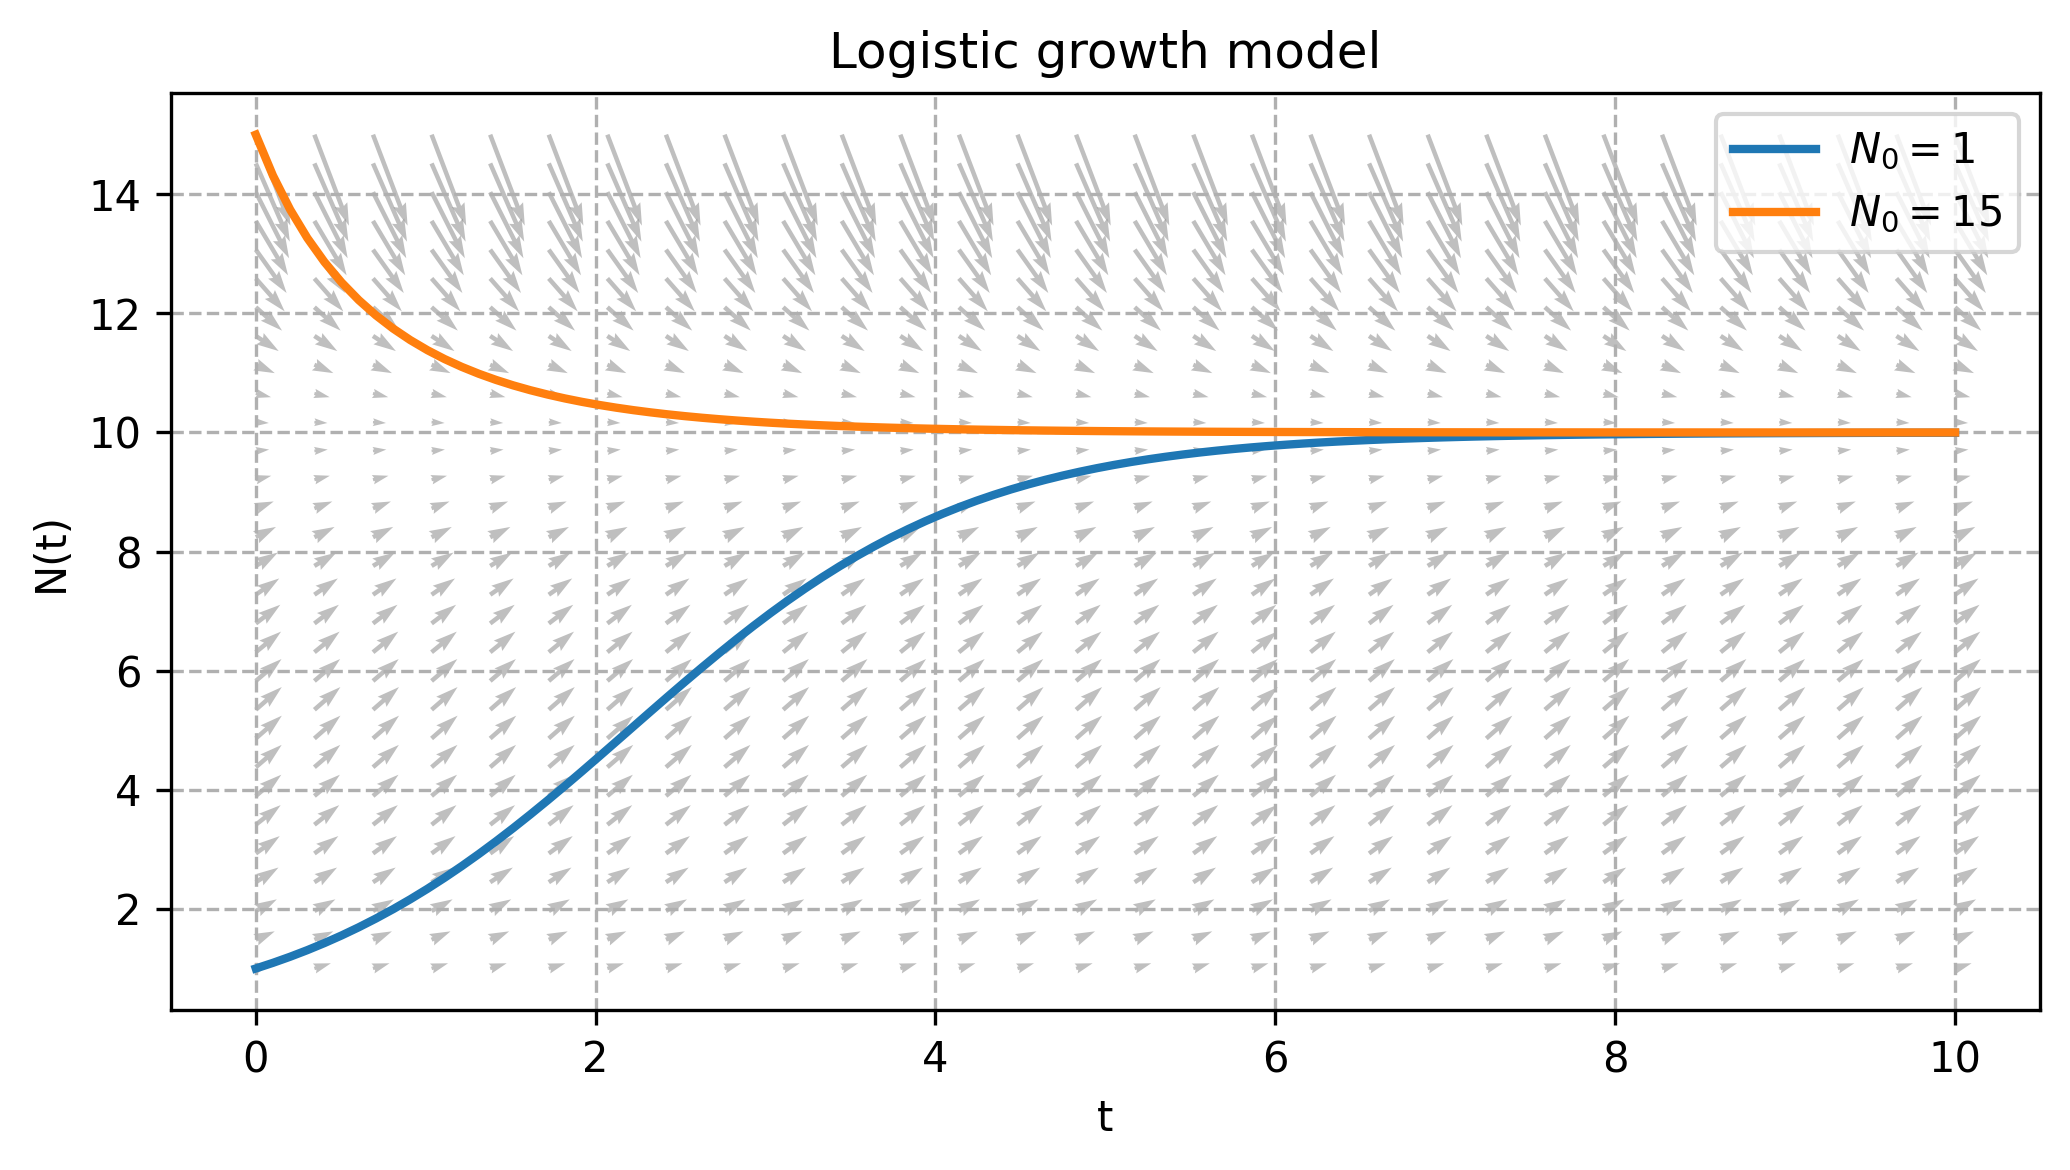

In [35]:
plt.figure(figsize=(7, 4), dpi=300)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.plot(t, sN1, lw=2, label='$N_0=15$')

xs = np.linspace(0, 10, 30)
ys = np.linspace(1, 15, 30)
Xs, Ys = np.meshgrid(xs, ys)

arrows_y = growth_model(Ys, Xs, r, K)
arrows_x = np.ones_like(arrows_y)
plt.quiver(Xs, Ys, arrows_x, arrows_y, color='gray', alpha=0.5, angles='xy')

plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('Logistic growth model')
plt.grid(ls='--')
plt.legend()
plt.tight_layout()

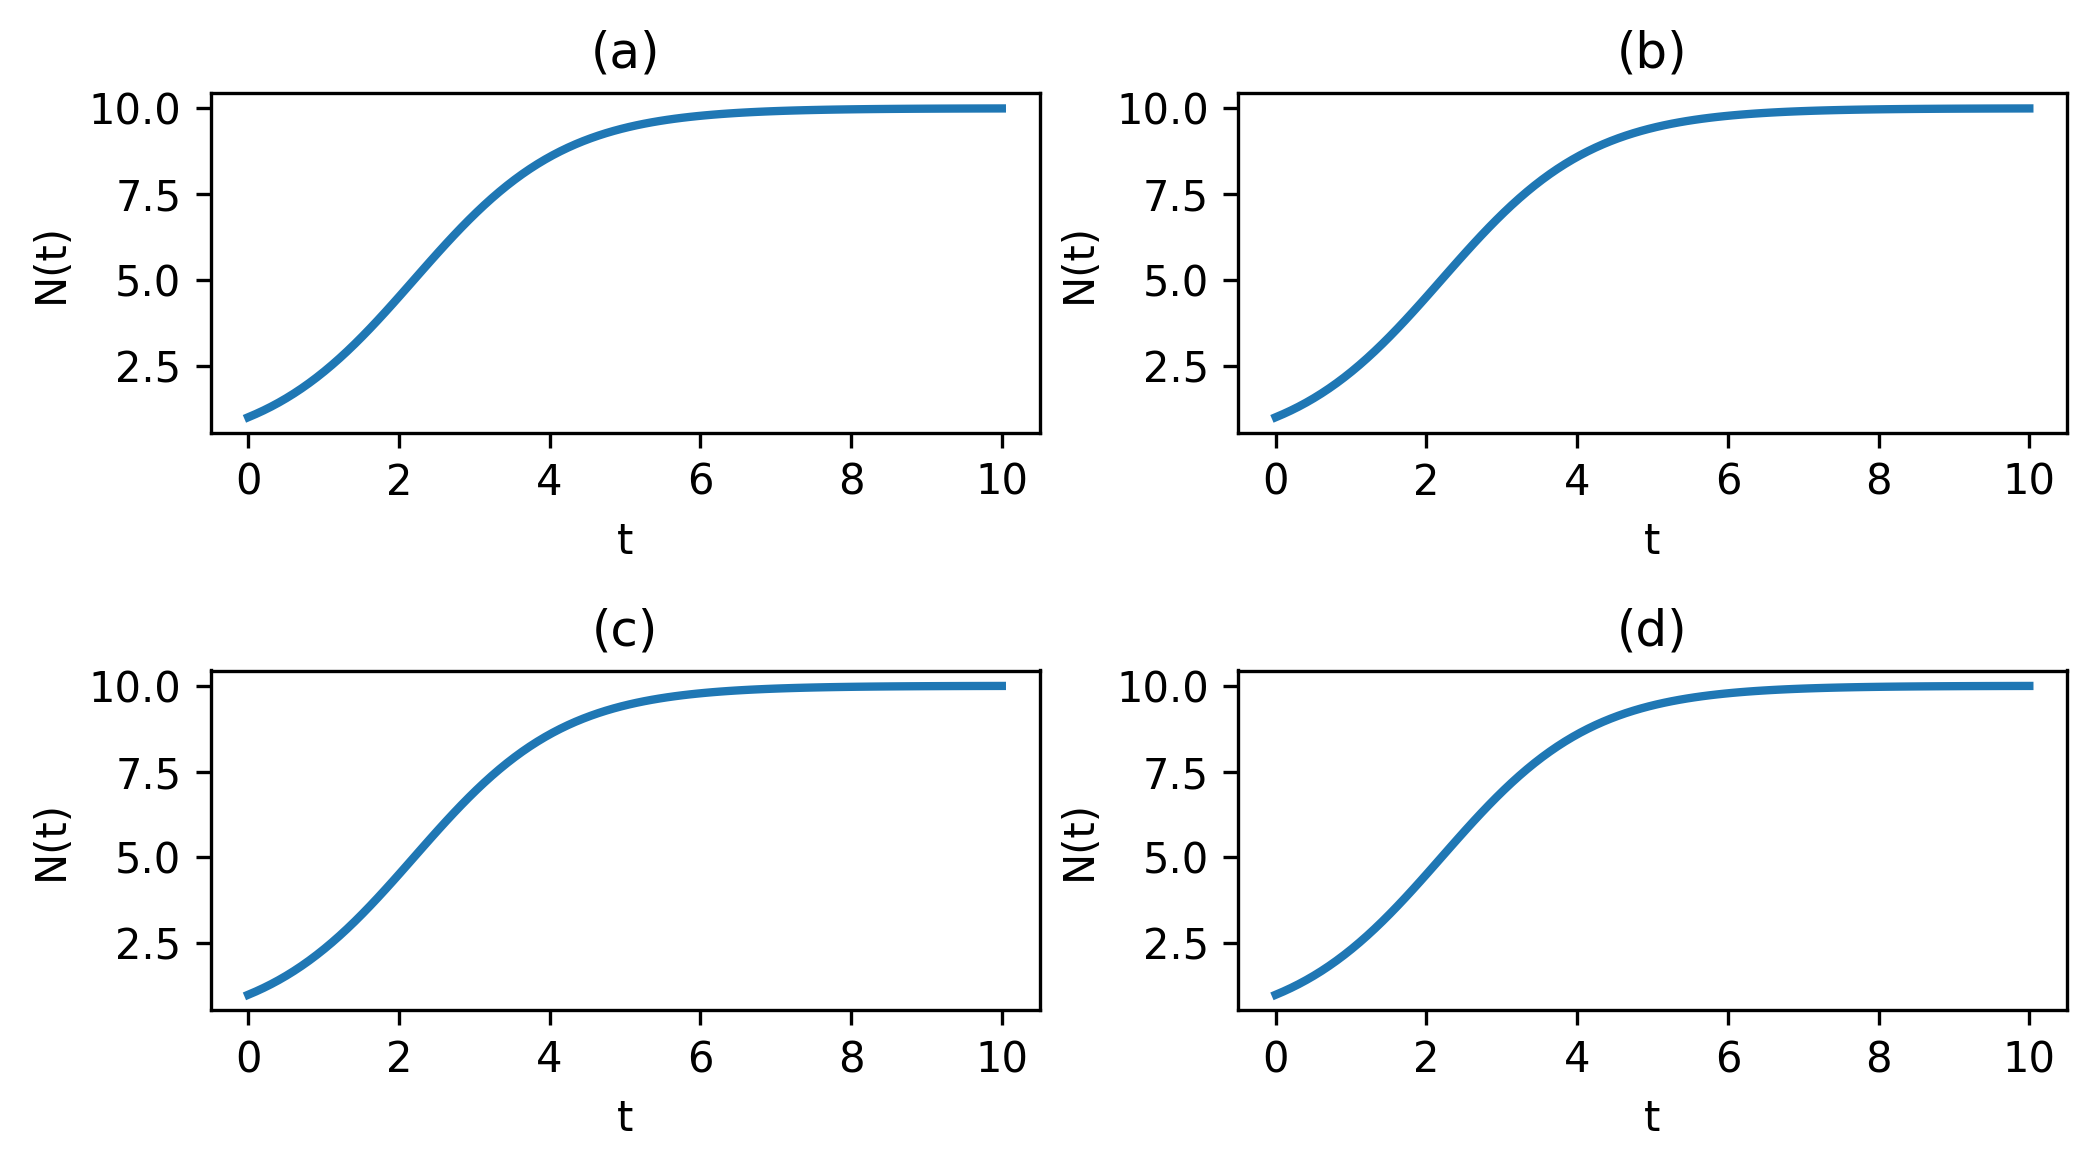

In [40]:
plt.figure(figsize=(7, 4), dpi=300)

plt.subplot(221)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(a)')

plt.subplot(222)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(b)')

plt.subplot(223)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(c)')

plt.subplot(224)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(d)')

plt.tight_layout()


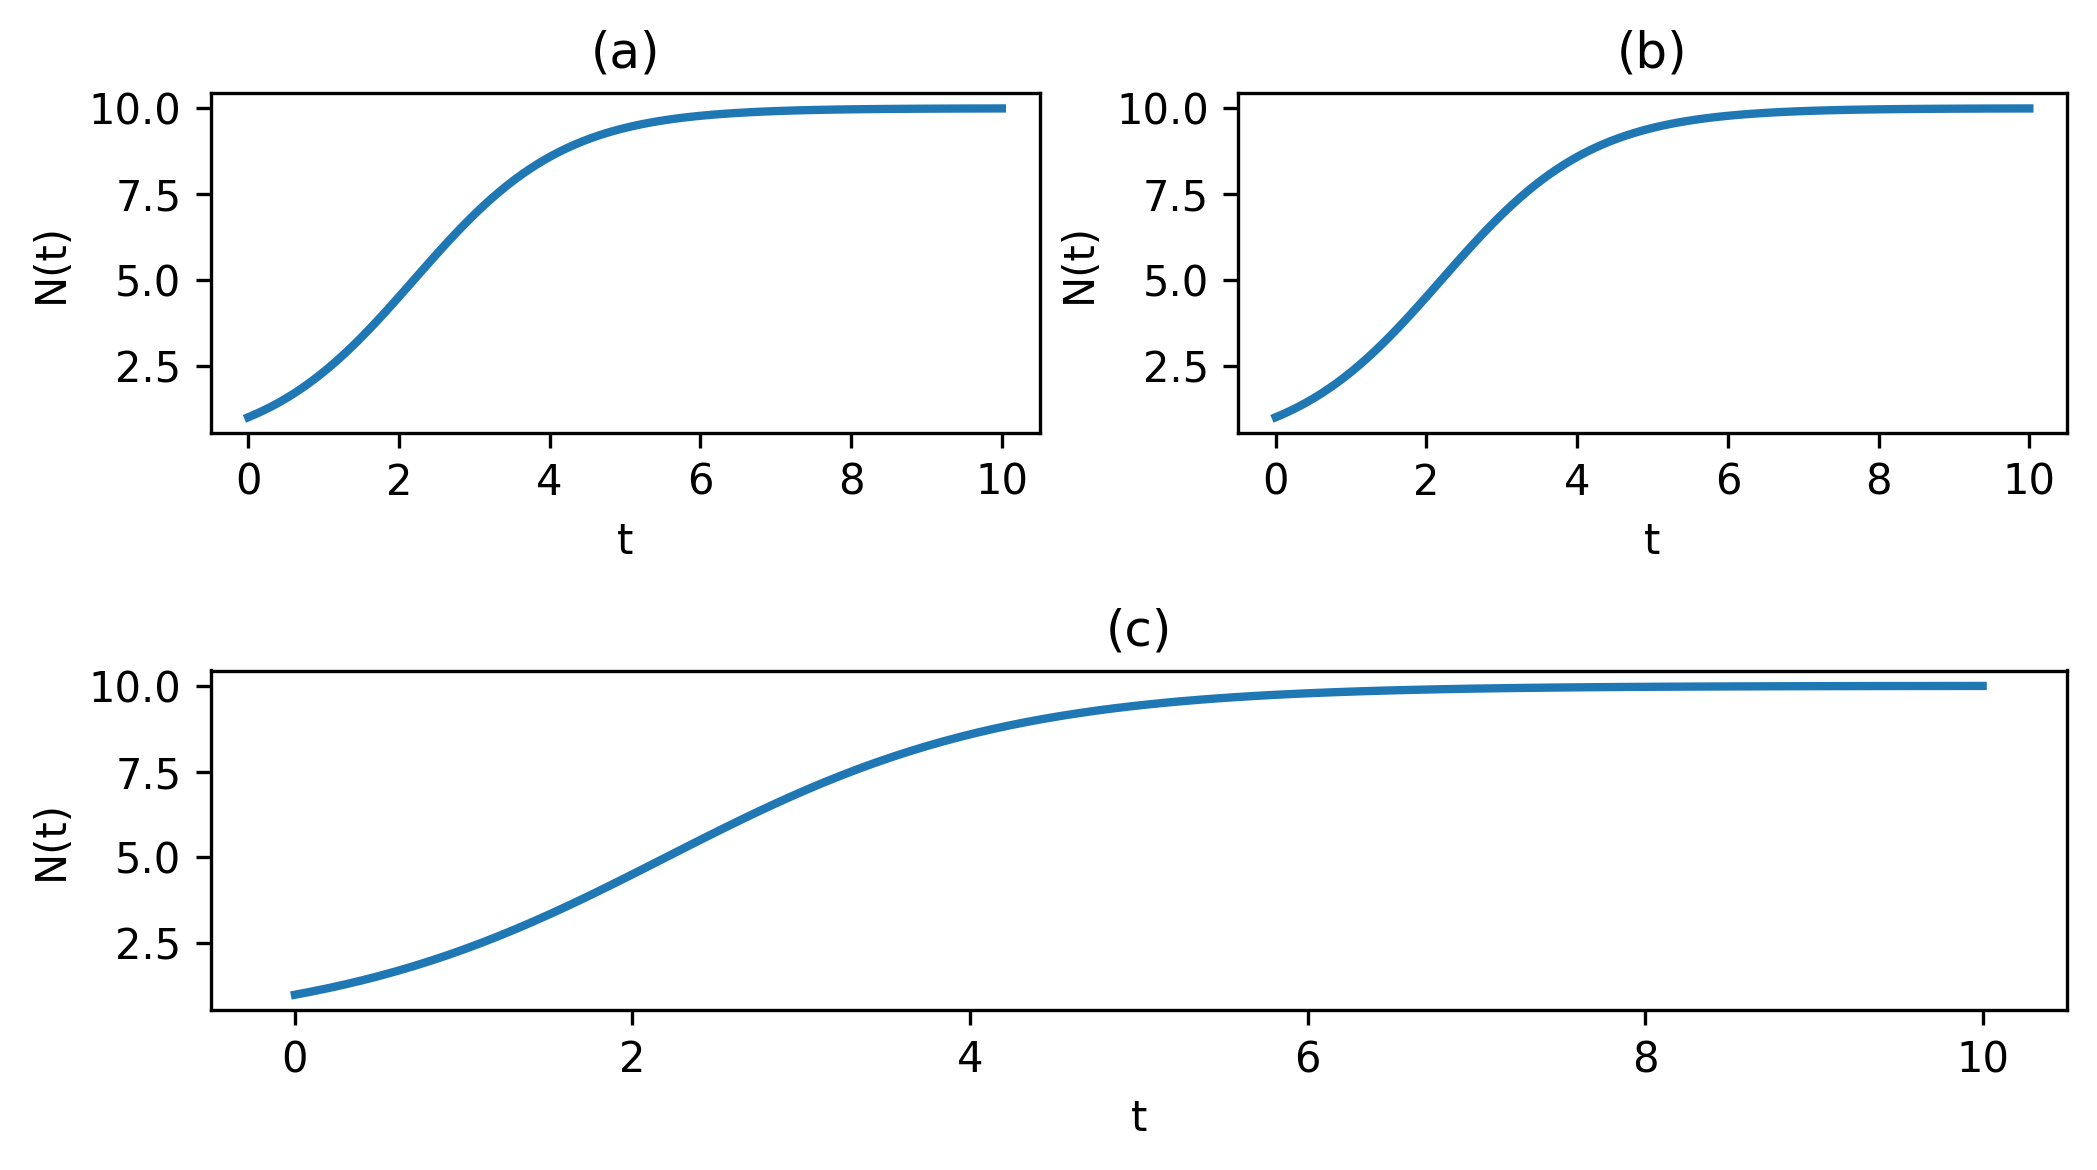

In [41]:
plt.figure(figsize=(7, 4), dpi=300)

plt.subplot(221)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(a)')

plt.subplot(222)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(b)')

plt.subplot(212)
plt.plot(t, sN0, lw=2, label='$N_0=1$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('(c)')

plt.tight_layout()

In [49]:
fig = plt.figure(figsize=(7, 4))
fig.set_tight_layout(True)

ax = plt.subplot()
line, = ax.plot([], [], 'C0--', lw=2)
point, = ax.plot([], [], 'C0o', lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)

plt.close()

def animation_frame(i):
    line.set_data(t[:i], sN0[:i])
    point.set_data([t[i]], [sN0[i]])
    return line, point

anim = FuncAnimation(fig, animation_frame, frames=len(t), interval=40, blit=True)
anim.save('logistic_growth_animation.gif', writer='pillow', fps=25)
HTML(anim.to_jshtml())